# `k`-mean Clustering

**Welcome from Week 11** of Data Science *Using Python*!

ဒီတပါတ်မှာ ကျနော်တို့ **clustering** အကြောင်းကို ဆွေးနွေးကြမယ်။ 

## A Review

**Machine Learning (ML)** ဟာ Data Science ရဲ့ အရေးပါတဲ့ အစိတ်အပိုင်းတခုဖြစ်တယ်။ 

Machine Learning မှာ အောက်ပါအတိုင်း ၄ ပိုင်းပါဝင်တယ်လို့ ယေဘုယျအားဖြင့် ယူဆကြတယ်

1. **Regression** - Real number တွေကို ခန့်မှန်း/တွက်ချက် predict နိုင်တဲ့ Model များကို တည်ဆောက်ခြင်း
    * ဥပမာ ... အိမ်တလုံးရဲ့ တန်ဖိုး၊ မုန်တိုင်းရဲ့ ပြင်းထန်မှုအား စသည်
  
2. **Classification** - Category (class) တွေကို ခန့်မှန်း/တွက်ချက် predict နိုင်တဲ့ Model များကို တည်ဆောက်ခြင်း
    * ဥပမာ ... ပုံတပုံသည် ကြောင်/ခွေးဖြစ်သည်၊ Transaction တခုသည် Fraud ဖြစ်သည်/မဖြစ်သည်၊ မေးခွန်း၏ အဖြေသည် Y/N ဖြစ်သည် စသည်

3. **Clustering** - Sample (point/vector) တွေကို တူရာ စုပေးခြင်း (ဒီနေ့ လေ့လာမဲ့ အပိုင်း) နဲ့

4. **Dimensionality Reduction** - Data များ၏ dimension (column အရေအတွက်) ကို လျှော့ချခြင်း (part 2 မှာ လေ့လာမဲ့ အပိုင်း) တို့ ဖြစ်ကြတယ်။

## Clustering Techniques

Clustering မှာ label မရှိဘူး၊ Data တွေကို အစုဘယ်နှစု စုပုံပေးရမယ်ဆိုတဲ့ အစုအရေအတွက် (number of cluster) ကို ကြိုသိ/မသိပေါ်မှာ မူတည်ပြီး Clustering Techniques တွေကို 2 မျိုး ခွဲနိုင်တယ်။ 

1. Clustering techniques where number of cluster is known in advance and
2. Clustering techniques where number of cluster is NOT known in advance

ထုံးစံအတိုင်း အသင့်ရေးထားတဲ့ code တွေနဲ့ စလိုက်ရအောင်။

In [13]:
%matplotlib inline

import numpy as np

from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
from sklearn import datasets
from sklearn import cluster

In [2]:
df_X, ds_y = datasets.fetch_california_housing(return_X_y=True, as_frame=True)
df_X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


`Latitude` နဲ့ `Longitude` ကို အခု ပုံဆွဲကြည့်ရအောင်။

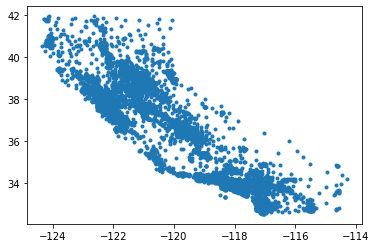

In [24]:
plt.scatter(df_X.Longitude, df_X.Latitude, marker=".")
plt.show()

In [7]:
model = cluster.KMeans()
model.fit(df_X[["Longitude", "Latitude"]])
results = model.transform(df_X[["Longitude", "Latitude"]])
results[:10]

array([[2.71240911, 5.67412737, 0.77634989, 1.38431449, 7.17252869,
        2.8576693 , 0.09000867, 3.99656494],
       [2.73447976, 5.65316867, 0.7558439 , 1.39096011, 7.15166499,
        2.84007847, 0.1069856 , 3.97490442],
       [2.73814393, 5.66101502, 0.76515385, 1.41227514, 7.1597511 ,
        2.85397957, 0.0953815 , 3.98053016],
       [2.73525318, 5.66835798, 0.77305135, 1.41948329, 7.16716794,
        2.86305893, 0.08768947, 3.98713627],
       [2.73525318, 5.66835798, 0.77305135, 1.41948329, 7.16716794,
        2.86305893, 0.08768947, 3.98713627],
       [2.73525318, 5.66835798, 0.77305135, 1.41948329, 7.16716794,
        2.86305893, 0.08768947, 3.98713627],
       [2.74483279, 5.66157884, 0.76698945, 1.42641522, 7.16046778,
        2.85888893, 0.09464422, 3.97964071],
       [2.74483279, 5.66157884, 0.76698945, 1.42641522, 7.16046778,
        2.85888893, 0.09464422, 3.97964071],
       [2.74198555, 5.66893871, 0.7749973 , 1.43362203, 7.16789784,
        2.86798762, 0.088030

`KMeans` model ရဲ့ `transform` result က sample (row/vector/point) တခုချင်းကနေ cluster တခုချင်းစီရဲ့ အလယ်မှတ် (centroid) ကြား distance ပဲဖြစ်တယ်။ `KMeans` ရဲ့ default `n_clusters` ဟာ 8 ဖြစ်တာမို့ အပေါ်က `result` မှာ column 8 ခု ပါတာကို သတိထားပါ။

တနည်းအားဖြင့် အဲဒီ column 8 ခုထဲက အငယ်ဆုံး distance ပိုင်ရှင် cluster ထဲမှာ အဲဒီ data sample (row/vector/point) ပါတယ်။ 

**row-by-row အငယ်ဆုံး ဂဏန်းရဲ့ index ကို ရှာတာ ဘယ်လိုရှာကြသလဲ။**

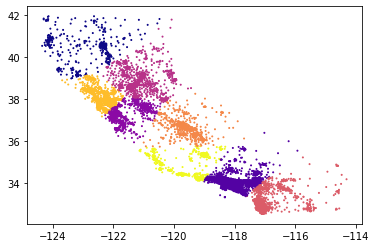

In [33]:
clusters = np.argmin(results, axis=1)
cmap = {idx: c for idx, c in enumerate(mcolors.TABLEAU_COLORS.values())}
plt.scatter(df_X["Longitude"], df_X["Latitude"], s=1, c=clusters, cmap="plasma")
plt.show()

**COOL!!!**

Now, try it with different parameters. `KMeans()` ရဲ့ parameter တွေက ... 

* `n_clusters` : default 8
* `init` : default 'k-means++' or 'random' or array-like of (n_clusters, n_features) giving initial centers
* `n_init` : how many time to try clustering to get the best. များလေ ကြာလေ၊ နည်းလေ performance မကောင်းလေ
* `max_iter` : number of iterations. များလေ ကြာလေ၊ နည်းလေ performance မကောင်းလေ
* `tol` : default 1e-4 (0.0001) when to stop before `max_iter`. များလေ မြန်လေ၊ performance မကောင်းလေ
* `random_state` : for debugging

In [ ]:
# try a 3 different sets of parameters.
# draw them out and show in chatbox. 